In [1]:
import numpy as np # linear algebra  
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
#run following commands to install librosa module for anaconda for first time
#conda install -c numba numba
#conda install -c conda-forge librosa
import librosa # to extract speech features
import librosa.display #to display audio as wave plot, spectrogram, or colormap
import wave # read and write WAV files
#run following commands to install soundfile module for anaconda for first time
#conda install -c conda-forge pysoundfile
import soundfile
import matplotlib.pyplot as plt # to generate the visualizations
import random # to shuffle the train and test data
import glob
# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import confusion_matrix #confusion matrix

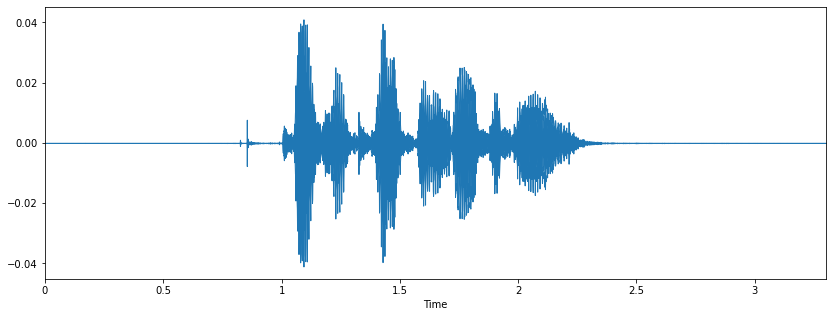

In [2]:
#display waveform
audio_path = 'RAVDESS Temp/03-01-01-01-01-01-01.wav'
x , sr = librosa.load(audio_path)
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [17]:
x

array([[-3.56307617e+02,  3.92953491e+01, -3.81873941e+00, ...,
         5.73766530e-01,  6.07277274e-01,  5.90959191e-01],
       [-6.48970947e+02,  7.19074173e+01,  2.74220419e+00, ...,
         7.64646232e-01,  7.47048497e-01,  7.47089744e-01],
       [-5.15315552e+02,  9.67091064e+01,  1.70006809e+01, ...,
         2.03015074e-01,  2.37657100e-01,  2.91299492e-01],
       ...,
       [-4.45449463e+02,  5.59253120e+01,  1.22928534e+01, ...,
         5.17992616e-01,  5.14647245e-01,  4.81383771e-01],
       [-5.33985168e+02,  6.40282745e+01, -7.38168240e+00, ...,
         5.14907777e-01,  4.59846735e-01,  5.68607807e-01],
       [-5.17507385e+02,  6.16119385e+01, -3.44559517e+01, ...,
         6.83038056e-01,  6.26244068e-01,  6.53781772e-01]])

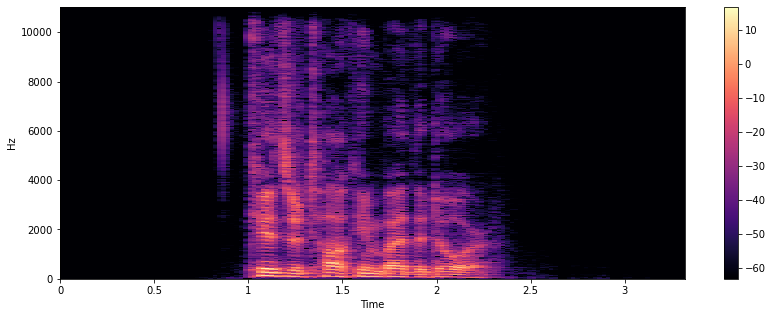

In [3]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [22]:
#40 feautres using mfcc
#12 feautres using chroma
#total of 52 features will be extracted
def extract_feature(file_name):

    X,sample_rate = librosa.load(os.path.join(file_name),res_type='kaiser_fast')
    result = np.array([])
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfccs))
    
    stft = np.abs(librosa.stft(X))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, chroma))
    return result
#path='D:/College Work/Sem 5/Special Topic - Mini Project/Dataset/RAVDESS Emotional speech audio/Actor_01/03-01-01-01-01-01-01.wav'
#feature = extract_feature(path, mfcc=True, chroma=True, mel=False)
#print(len(feature))

In [5]:
#emotions codes from datasets
emotions_RAVDESS = {"01": "neutral",
            "02": "calm",
            "03": "happy",
            "04": "sad",
            "05": "angry",
            "06": "fearful",
            "07": "disgust",
            "08": "surprised"}
emotions_TESS = {"neutral": "neutral",
            "happy": "happy",
            "sad": "sad",
            "angry": "angry",
            "fear": "fearful",
            "disgust": "disgust",
            "ps": "surprised"}

In [9]:
def load_dataset_RAVDESS(data_path = 'RAVDESS Temp'):
    x,y=[],[]
    for (dirpath, dirnames, filenames) in os.walk(data_path):
        for i in filenames:
            x.append(extract_feature(data_path+'/'+str(i)))
            y.append(emotions_RAVDESS[(str(i).strip('.wav').split("-")[2])])
    return x,y

In [10]:
def load_dataset_TESS(data_path = 'TESS Temp'):
    x,y=[],[]
    for (dirpath, dirnames, filenames) in os.walk(data_path):
        for i in filenames:
            x.append(extract_feature(data_path+'/'+str(i)))
            y.append(emotions_TESS[(str(i).strip('.wav').split("_")[2])])
    return x,y

In [11]:
def load_dataset():
    x1,y1 = load_dataset_RAVDESS()
    x2,y2 = load_dataset_TESS()
    x=x1+x2
    y=y1+y2
    for a in range(len(x)-1,0,-1):
        b = random.randint(0,a+1)
        x[a],x[b]=x[b],x[a]
        y[a],y[b]=y[b],y[a]
    return x,y
        
#x_train,x_test,y_train,y_test=load_dataset(0.2)
x,y = load_dataset()

In [14]:
print('Number of Samples = ',len(x))
x = np.asarray(x)
y = np.asarray(y)
print('Shape = ', x.shape, y.shape)

Number of Samples =  5252
Shape =  (5252, 52) (5252,)


In [15]:
f_x=open('x.npy','wb')
np.save(f_x,x)
f_y=open('y.npy','wb')
np.save(f_y,y)